C:\Users\Khalid Akindele\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules:
               antecedents                       consequents   support  \
0          (bottled water)                        (UHT-milk)  0.021293   
1               (UHT-milk)                   (bottled water)  0.021293   
2       (other vegetables)                        (UHT-milk)  0.038994   
3               (UHT-milk)                (other vegetables)  0.038994   
4               (UHT-milk)                      (rolls/buns)  0.031042   
...                    ...                               ...       ...   
2951  (rolls/buns, yogurt)                (soda, whole milk)  0.024628   
2952                (soda)  (rolls/buns, whole milk, yogurt)  0.024628   
2953          (whole milk)        (soda, rolls/buns, yogurt)  0.024628   
2954              (yogurt)    (soda, whole milk, rolls/buns)  0.024628   
2955          (rolls/buns)        (soda, whole milk, yogurt)  0.024628   

      confidence      lift  
0       0.099640  1.269268  
1       0.271242  1.269268  
2    

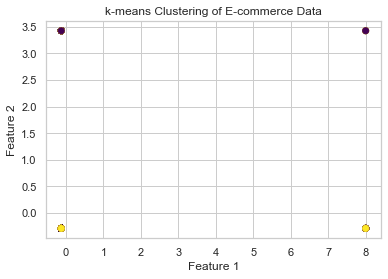

Cluster Assignments:
itemDescription  cluster
Member_number           
1000                   0
1001                   2
1002                   2
1003                   2
1004                   0
...                  ...
4996                   0
4997                   2
4998                   2
4999                   0
5000                   2

[3898 rows x 1 columns]
Available filtering options:
1. Filter by Lift
2. Filter by Confidence
3. Filter by Support
Enter the number of your choice (1-3) or press 'Enter' to finish: 3
Enter the minimum value for criterion 3: .5
Enter the number of your choice (1-3) or press 'Enter' to finish: 
Filtered Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


C:\Users\Khalid Akindele\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\Khalid Akindele\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


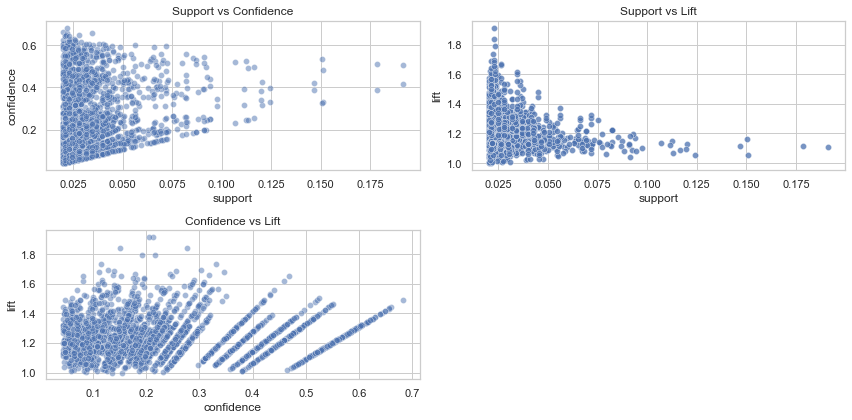

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')

# Data preprocessing
basket = (df.groupby(['Member_number', 'itemDescription'])
          .size()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('Member_number'))

# Convert counts to binary values (0 or 1)
def encode_units(x):
    return 1 if x > 0 else 0

basket_sets = basket.applymap(encode_units)

# Run Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the resulting rules
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


# Convert counts to binary values (0 or 1)
def encode_units(x):
    return 1 if x > 0 else 0

# Standardize the data
scaler = StandardScaler()
basket_scaled = scaler.fit_transform(basket_sets)

# Use k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(basket_scaled)

# Add the cluster labels to the original dataset
basket_sets['cluster'] = clusters

# Visualize the clusters
plt.scatter(basket_scaled[:, 0], basket_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('k-means Clustering of E-commerce Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Display cluster assignments for each member_number
print("Cluster Assignments:")
print(basket_sets[['cluster']])

# Convert counts to binary values (0 or 1)
def encode_units(x):
    return 1 if x > 0 else 0

#function to filter through association rules
def filter_rules(rules_df):
    filtered_rules = rules_df.copy()

    print("Available filtering options:")
    print("1. Filter by Lift")
    print("2. Filter by Confidence")
    print("3. Filter by Support")

    criteria = []

    while True:
        choice = input("Enter the number of your choice (1-3) or press 'Enter' to finish: ")
        if choice == '':
            break
        elif choice in ('1', '2', '3'):
            min_value = float(input(f"Enter the minimum value for criterion {choice}: "))
            criteria.append((choice, min_value))
        else:
            print("Invalid choice. Please enter a number between 1 and 3 or press 'Enter' to finish.")

    for criterion, min_value in criteria:
        if criterion == '1':
            filtered_rules = filtered_rules[filtered_rules['lift'] > min_value]
        elif criterion == '2':
            filtered_rules = filtered_rules[filtered_rules['confidence'] > min_value]
        elif criterion == '3':
            filtered_rules = filtered_rules[filtered_rules['support'] > min_value]

    return filtered_rules

# Allow the user to filter rules interactively
filtered_rules = filter_rules(rules)

# Display the resulting rules
print("Filtered Association Rules:")
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Convert counts to binary values (0 or 1)
def encode_units(x):
    return 1 if x > 0 else 0


# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Visualize association rules using Seaborn
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.scatterplot(x='support', y='confidence', data=rules, alpha=0.5)
plt.title('Support vs Confidence')

plt.subplot(2, 2, 2)
sns.scatterplot(x='support', y='lift', data=rules, alpha=0.5)
plt.title('Support vs Lift')

plt.subplot(2, 2, 3)
sns.scatterplot(x='confidence', y='lift', data=rules, alpha=0.5)
plt.title('Confidence vs Lift')

plt.tight_layout()
plt.show()


In [2]:
pip install mlxtend

  Using cached mlxtend-0.23.0-py3-none-any.whl (1.4 MB)

